In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()
# Uneven distribution

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#One hot encoding for categorical parameters Geography and Gender
df = pd.get_dummies(df,columns = ['Gender','Geography'],drop_first = True)

In [16]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [24]:
#Scale down the values always before training a neural network
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.91324755,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]])

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [51]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [67]:
hist = model.fit(X_train_scaled,y_train,epochs=25,validation_split = 0.2)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3321 - val_accuracy: 0.8631 - val_loss: 0.3296
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.3194 - val_accuracy: 0.8612 - val_loss: 0.3255
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3166 - val_accuracy: 0.8612 - val_loss: 0.3271
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8656 - loss: 0.3194 - val_accuracy: 0.8594 - val_loss: 0.3269
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3140 - val_accuracy: 0.8544 - val_loss: 0.3269
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3101 - val_accuracy: 0.8587 - val_loss: 0.3261
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3058 - val_accuracy: 0.8556 - val_loss: 0.3265
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8660 - loss: 0.3186 - val_accuracy: 0.

In [68]:
model.layers[0].get_weights()

[array([[ 5.3953004e-01,  1.4635405e-01, -2.6103338e-02, -1.3909666e-02,
         -1.6299146e-01, -1.4184298e-01, -2.0432612e-02, -8.6235747e-02,
         -1.6076119e-01, -3.1281891e-01,  3.7899306e-01],
        [-5.9832823e-01,  8.7896502e-01,  2.3739833e-01, -1.4552887e-01,
         -3.3779475e-01,  1.1167468e+00, -7.2648823e-02, -9.4736499e-01,
          7.3891920e-01, -3.6423162e-01, -1.3917419e-01],
        [-3.4597912e-01, -1.4152111e-01,  1.4480214e-01, -1.9593269e-01,
          3.6326343e-01, -2.6568195e-02, -1.9259864e-01,  1.7440051e-01,
          1.1043450e-01, -2.2599839e-01,  2.7516648e-01],
        [ 2.2178207e-02,  2.9832438e-01,  3.4676697e-02, -6.1719820e-02,
          1.4238346e-01, -9.8631628e-02,  9.4690377e-01,  7.3219605e-02,
         -1.4839840e-01,  3.5362408e-01,  1.0334363e-01],
        [ 5.7286614e-01,  1.7522720e-01,  1.0475765e+00, -9.5285988e-01,
          9.7944295e-01, -4.1791746e-01,  1.0396022e+00,  8.5025482e-02,
         -1.0688472e-02, -2.3955676e-0

In [69]:
model.layers[1].get_weights()

[array([[ 0.20262215,  0.16148606, -0.21253228,  0.3367552 , -0.41732174,
          0.19952622, -0.89485383, -0.10354351,  0.02260886,  0.4638133 ,
          0.2921472 ],
        [ 0.8181343 , -0.13102205,  0.15690097,  0.30428445,  0.07728978,
          0.6386157 ,  0.27470306,  0.14091943, -0.12995549, -0.3189653 ,
         -0.47825068],
        [ 0.1600108 , -0.23846722,  0.15457478, -0.36981067,  0.58357173,
          0.70086426,  0.77580863,  0.6454614 ,  0.33499345,  1.062451  ,
         -1.6973395 ],
        [-0.7483558 ,  0.49039644,  0.039885  ,  0.05689017,  0.23215102,
          0.20722833, -0.8506232 ,  0.6094658 ,  0.18026933, -0.1522704 ,
          0.58261603],
        [ 0.93349665,  0.38713142, -0.36206546,  0.8043494 ,  0.38730323,
         -0.04219621,  0.6913518 , -0.09331049,  0.13965671,  0.5203934 ,
          0.43734545],
        [-0.21387178, -0.85318226,  0.5012153 , -0.5802077 ,  0.34098652,
         -0.07499558, -1.2867744 , -0.25057402,  0.16155057, -0.3563921

In [70]:
#Sigmoid Activation, so the probability is between 0 and 1
y_log = model.predict(X_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [71]:
y_pred = np.where(y_log>0.5,1,0)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [74]:
import matplotlib.pyplot as plt

In [75]:
hist.history

{'accuracy': [0.8682812452316284,
  0.8665624856948853,
  0.8667187690734863,
  0.867968738079071,
  0.867968738079071,
  0.8681250214576721,
  0.8670312762260437,
  0.8673437237739563,
  0.8662499785423279,
  0.8678125143051147,
  0.8676562309265137,
  0.8671875,
  0.8682812452316284,
  0.8667187690734863,
  0.8675000071525574,
  0.8698437213897705,
  0.8684375286102295,
  0.8706250190734863,
  0.8667187690734863,
  0.8690624833106995,
  0.8693749904632568,
  0.8693749904632568,
  0.8678125143051147,
  0.8673437237739563,
  0.8701562285423279],
 'loss': [0.31925034523010254,
  0.3193959891796112,
  0.31901490688323975,
  0.31925085186958313,
  0.3191949427127838,
  0.3189554810523987,
  0.318695992231369,
  0.31869134306907654,
  0.3182825446128845,
  0.3179077208042145,
  0.3183567225933075,
  0.3183487057685852,
  0.31780457496643066,
  0.31811490654945374,
  0.31761205196380615,
  0.3180125951766968,
  0.3173545300960541,
  0.31770703196525574,
  0.31799185276031494,
  0.3176273405

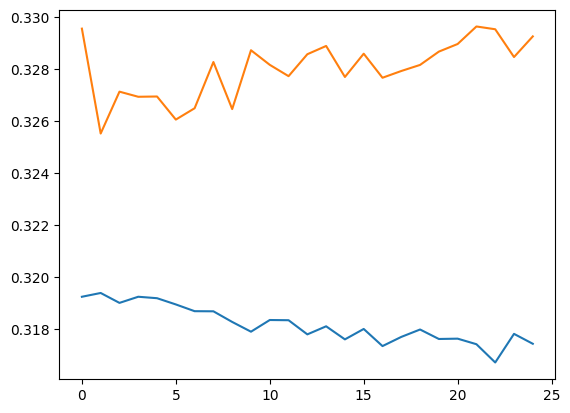

In [79]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

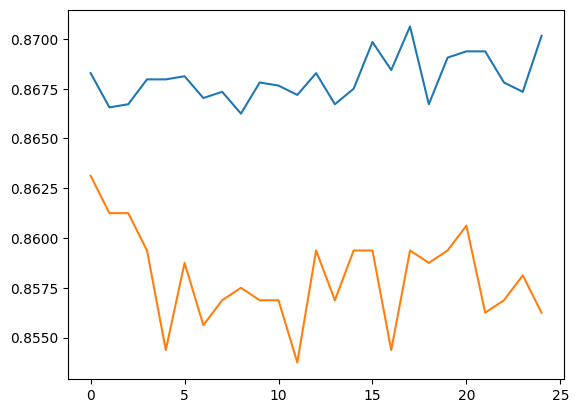

In [82]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])